In [27]:
import pandas as pd
from datetime import date
from matplotlib import pyplot as plt

In [2]:
def load_csv(data_source):
    customers = pd.read_csv(data_source["customers"])
    products = pd.read_csv(data_source["products"])
    returns = pd.read_csv(data_source["returns"])
    sales = pd.read_csv(data_source["sales"])
    transactions = pd.read_csv(data_source["transactions"])

    return {
        "customers":customers,
        "products":products,
        "returns":returns,
        "sales":sales,
        "transactions":transactions
    }
    

In [3]:
dataset = load_csv({
    "customers":"/home/steve/Code/Datasets/Pandas_Project/customers.csv",
    "products":"/home/steve/Code/Datasets/Pandas_Project/products.csv",
    "returns":"/home/steve/Code/Datasets/Pandas_Project/returns.csv",
    "sales":"/home/steve/Code/Datasets/Pandas_Project/sales.csv",
    "transactions":"/home/steve/Code/Datasets/Pandas_Project/transactions.csv",
})


customers = dataset["customers"]
products = dataset["products"]
returns = dataset["returns"]
sales = dataset["sales"]
transactions = dataset["transactions"]

In [4]:
customers.head(3)

,customer_id,first_name,last_name,email,dob,city,country,signup_date
0,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06
1,2,Bob,Smith,user1mail.com,1984-08-29,Nairobi,France,2017-05-12
2,3,Diana,Kim,user2@mail.com,1995-06-12,Paris,Kenya,2018-08-24


In [5]:
products.head(3)

,product_id,product_name,category,sub_category,cost_price,sell_price
0,1,Product_1,Clothing,A,14.50,70.14
1,2,Product_2,Electronics,A,42.24,26.50
2,3,Product_3,electronics,B,36.35,17.52


In [6]:
returns.head(3)

,return_id,transaction_id,return_reason
0,1,37,Changed Mind
1,2,241,Damaged
2,3,360,Wrong Item


In [7]:
sales.head(3)

,region,month,total_sales
0,South,2023-01-31,64176
1,East,2023-02-28,14414
2,East,2023-03-31,72137


In [8]:
transactions.head(3)

,transaction_id,customer_id,product_id,quantity,date
0,1,165,20,3,2022-01-01 00:00:00
1,2,125,41,3,2022-01-01 01:00:00
2,3,81,45,1,2022-01-01 02:00:00


In [9]:
products.describe()

,product_id,cost_price,sell_price
count,100.000000,100.000000,100.000000
mean,50.500000,24.048800,49.294700
std,29.011492,14.132172,28.523014
min,1.000000,2.110000,5.350000
25%,25.750000,12.057500,25.580000
50%,50.500000,23.840000,47.635000
75%,75.250000,35.570000,74.272500
max,100.000000,49.230000,98.910000


In [10]:
def data_state(data):
    for key, df in data.items():

        print(f"\n==========Table Name : {key}==========\n =====Duplicate Rows summary=====")
        print(f"Count : {df.duplicated().sum()}")
        
        print(f"\n==========Table Name : {key}==========\n =====Missing Values summary=====")

        for column in df.columns:
            if column.__contains__("date") or column.__contains__("dob"):
                df[column] = pd.to_datetime(df[column],errors="coerce")
            missing_values_count = df[column].isnull().sum()
            column_length = len(df[column])
            print(f"{column} : {df[column].isnull().sum()} :- {missing_values_count/column_length * 100}% ")
            
            print(df[column].dtype)
            

In [11]:
data_state(dataset)


==========Table Name : customers==========
 =====Duplicate Rows summary=====
Count : 0

==========Table Name : customers==========
 =====Missing Values summary=====
customer_id : 0 :- 0.0% 
int64
first_name : 0 :- 0.0% 
object
last_name : 0 :- 0.0% 
object
email : 0 :- 0.0% 
object
dob : 0 :- 0.0% 
datetime64[ns]
city : 8 :- 4.0% 
object
country : 0 :- 0.0% 
object
signup_date : 0 :- 0.0% 
datetime64[ns]

==========Table Name : products==========
 =====Duplicate Rows summary=====
Count : 0

==========Table Name : products==========
 =====Missing Values summary=====
product_id : 0 :- 0.0% 
int64
product_name : 0 :- 0.0% 
object
category : 0 :- 0.0% 
object
sub_category : 0 :- 0.0% 
object
cost_price : 0 :- 0.0% 
float64
sell_price : 0 :- 0.0% 
float64

==========Table Name : returns==========
 =====Duplicate Rows summary=====
Count : 0

==========Table Name : returns==========
 =====Missing Values summary=====
return_id : 0 :- 0.0% 
int64
transaction_id : 0 :- 0.0% 
int64
return_reason

In [12]:
df1 = customers.merge(transactions, how="inner")
df1.head(3)

,customer_id,first_name,last_name,email,dob,city,country,signup_date,transaction_id,product_id,quantity,date
0,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,89,24,3,2022-01-04 16:00:00
1,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,113,14,4,2022-01-05 16:00:00
2,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,168,45,2,2022-01-07 23:00:00


In [13]:
rdf1 = customers.merge(transactions, how='left', on='customer_id')
rdf1.tail(5)

,customer_id,first_name,last_name,email,dob,city,country,signup_date,transaction_id,product_id,quantity,date
511,198,Mary,Lee,user197@mail.com,1966-12-14,Lyon,Italy,2017-11-09,141.0,23.0,2.0,2022-01-06 20:00:00
512,199,Mary,Adams,user198@mail.com,1979-04-27,Milan,Kenya,2024-09-07,222.0,24.0,2.0,2022-01-10 05:00:00
513,199,Mary,Adams,user198@mail.com,1979-04-27,Milan,Kenya,2024-09-07,395.0,26.0,4.0,2022-01-17 10:00:00
514,200,Diana,Smith,user199@mail.com,1991-07-13,Milan,Kenya,2022-02-02,247.0,26.0,4.0,2022-01-11 06:00:00
515,200,Diana,Smith,user199@mail.com,1991-07-13,Milan,Kenya,2022-02-02,295.0,7.0,3.0,2022-01-13 06:00:00


In [14]:
rdf2 = rdf1.merge(products, how="left", on="product_id")
rdf2.head()

,customer_id,first_name,last_name,email,dob,city,country,signup_date,transaction_id,product_id,quantity,date,product_name,category,sub_category,cost_price,sell_price
0,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,89.0,24.0,3.0,2022-01-04 16:00:00,Product_24,Clothing,C,47.61,20.44
1,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,113.0,14.0,4.0,2022-01-05 16:00:00,Product_14,Home,A,18.48,14.34
2,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,168.0,45.0,2.0,2022-01-07 23:00:00,Product_45,Home,B,29.55,69.49
3,2,Bob,Smith,user1mail.com,1984-08-29,Nairobi,France,2017-05-12,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,3,Diana,Kim,user2@mail.com,1995-06-12,Paris,Kenya,2018-08-24,297.0,47.0,1.0,2022-01-13 08:00:00,Product_47,Electronics,D,41.97,12.98


In [15]:
df2 = customers.merge(transactions, on=["customer_id"], how="outer")
df2.head(3)

,customer_id,first_name,last_name,email,dob,city,country,signup_date,transaction_id,product_id,quantity,date
0,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,89.0,24.0,3.0,2022-01-04 16:00:00
1,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,113.0,14.0,4.0,2022-01-05 16:00:00
2,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,168.0,45.0,2.0,2022-01-07 23:00:00


In [16]:
df3 = df2.merge(products, on='product_id', how='inner')
df3.head(3)

,customer_id,first_name,last_name,email,dob,city,country,signup_date,transaction_id,product_id,quantity,date,product_name,category,sub_category,cost_price,sell_price
0,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,89.0,24.0,3.0,2022-01-04 16:00:00,Product_24,Clothing,C,47.61,20.44
1,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,113.0,14.0,4.0,2022-01-05 16:00:00,Product_14,Home,A,18.48,14.34
2,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,168.0,45.0,2.0,2022-01-07 23:00:00,Product_45,Home,B,29.55,69.49


In [17]:
regex = r'^[a-z0-9.]+@[a-z0-9.]+.[a-z]$'

mask = df3['email'].str.contains(regex, regex=False, na=True)
mask[495] = True 
mask.tail()

495     True
496    False
497    False
498    False
499    False
Name: email, dtype: bool

In [18]:
invalid_email = df3[mask]
invalid_email

,customer_id,first_name,last_name,email,dob,city,country,signup_date,transaction_id,product_id,quantity,date,product_name,category,sub_category,cost_price,sell_price
495,198,Mary,Lee,user197@mail.com,1966-12-14,Lyon,Italy,2017-11-09,141.0,23.0,2.0,2022-01-06 20:00:00,Product_23,Grocery,D,25.87,5.35


In [19]:
def calc_age(dob):
    today = date.today()
    return today.year - dob.year

In [20]:
df3['customer_age'] = df3['dob'].map(calc_age)
df3.head()

,customer_id,first_name,last_name,email,dob,city,country,signup_date,transaction_id,product_id,quantity,date,product_name,category,sub_category,cost_price,sell_price,customer_age
0,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,89.0,24.0,3.0,2022-01-04 16:00:00,Product_24,Clothing,C,47.61,20.44,44
1,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,113.0,14.0,4.0,2022-01-05 16:00:00,Product_14,Home,A,18.48,14.34,44
2,1,Eve,Gates,user0@mail.com,1981-11-22,Milan,Germany,2024-03-06,168.0,45.0,2.0,2022-01-07 23:00:00,Product_45,Home,B,29.55,69.49,44
3,3,Diana,Kim,user2@mail.com,1995-06-12,Paris,Kenya,2018-08-24,297.0,47.0,1.0,2022-01-13 08:00:00,Product_47,Electronics,D,41.97,12.98,30
4,3,Diana,Kim,user2@mail.com,1995-06-12,Paris,Kenya,2018-08-24,372.0,27.0,4.0,2022-01-16 11:00:00,Product_27,Grocery,B,22.74,80.18,30


In [25]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    100 non-null    int64  
 1   product_name  100 non-null    object 
 2   category      100 non-null    object 
 3   sub_category  100 non-null    object 
 4   cost_price    100 non-null    float64
 5   sell_price    100 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


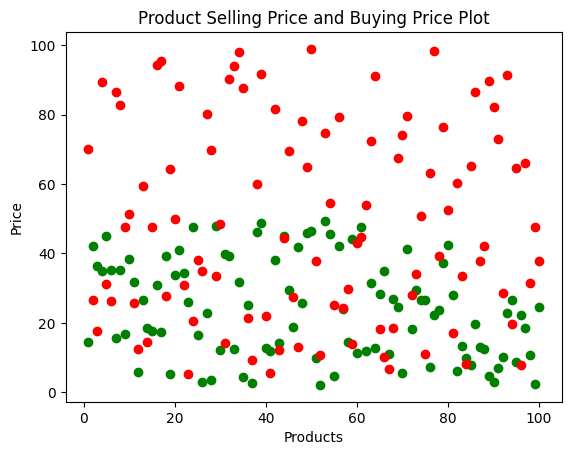

In [37]:
# Plot the buying price and the selling price line plots.
plt.scatter(products['product_id'], products['cost_price'], c='green')
plt.scatter(products['product_id'], products['sell_price'], c='red')
plt.title("Product Selling Price and Buying Price Plot")
plt.xlabel("Products")
plt.ylabel("Price")
plt.show()